# Speed Dating - Part I

## Challenge description

We will start a new data visualization and exploration project. Your goal will be to try to understand *love*! It's a very complicated subject so we've simplified it. Your goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a **second date**.

This is a Kaggle competition on which you can find more details here :

[Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Take some time to read the description of the challenge and try to understand each of the variables in the dataset. Help yourself with this from the document : *Speed Dating - Variable Description.md*

### Rendering

To be successful in this project, you will need to do a descriptive analysis of the main factors that influence getting a second appointment.

## 0. Import

In [56]:
# import
import os
import numpy as ny
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load data

In [2]:
# read data : dataframe_speeddating
speed_dating_data = "../data/Speed Dating Data.csv"
df_sd = pd.read_csv(speed_dating_data)
display(df_sd)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [3]:
df_sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


## 2. Data exploratory

#### 2.1 Data explaining

In [4]:
# number of values
n_records, n_features = df_sd.shape[0], df_sd.shape[1]
print("Dataset contains {} results and {} features.".format(n_records, n_features))

Dataset contains 8378 results and 195 features.


In [5]:
# columns name
columns_name = df_sd.columns
print("Features in dataset are : {}".format("\n".join(columns_name)))

Features in dataset are : iid
id
gender
idg
condtn
wave
round
position
positin1
order
partner
pid
match
int_corr
samerace
age_o
race_o
pf_o_att
pf_o_sin
pf_o_int
pf_o_fun
pf_o_amb
pf_o_sha
dec_o
attr_o
sinc_o
intel_o
fun_o
amb_o
shar_o
like_o
prob_o
met_o
age
field
field_cd
undergra
mn_sat
tuition
race
imprace
imprelig
from
zipcode
income
goal
date
go_out
career
career_c
sports
tvsports
exercise
dining
museums
art
hiking
gaming
clubbing
reading
tv
theater
movies
concerts
music
shopping
yoga
exphappy
expnum
attr1_1
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
attr4_1
sinc4_1
intel4_1
fun4_1
amb4_1
shar4_1
attr2_1
sinc2_1
intel2_1
fun2_1
amb2_1
shar2_1
attr3_1
sinc3_1
fun3_1
intel3_1
amb3_1
attr5_1
sinc5_1
intel5_1
fun5_1
amb5_1
dec
attr
sinc
intel
fun
amb
shar
like
prob
met
match_es
attr1_s
sinc1_s
intel1_s
fun1_s
amb1_s
shar1_s
attr3_s
sinc3_s
intel3_s
fun3_s
amb3_s
satis_2
length
numdat_2
attr7_2
sinc7_2
intel7_2
fun7_2
amb7_2
shar7_2
attr1_2
sinc1_2
intel1_2
fun1_2
amb1_2
shar1_2
attr4_2
s

In [6]:
# unqiue values
def uniques_values(df, column) :
    unique_column = ",".join(map(str, list(df[column].unique())))
    print("Unique values in dataset for feature '{}' are : \n{}\n".format(column, unique_column))
    
for column in columns_name : 
    uniques_values(df_sd, column)
    continue

Unique values in dataset for feature 'iid' are : 
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,26

In [7]:
# value counts
df_sd["career"].value_counts()

# nan values
# display(df_sd.isna().count())

Finance                     202
professor                   199
Lawyer                      154
Professor                   148
Consulting                  147
                           ... 
engineering professional      5
teaching                      5
Asset Management              5
MBA                           5
a research position           5
Name: career, Length: 367, dtype: int64

#### 2.2 People 
- How many records ? 
- How many people join ? 
- How many dates ? 
- How many waves ? 

In [8]:
# number of dates
print("We have {} dates in dataset".format(n_records))

We have 8378 dates in dataset


In [9]:
# number of different people
n_people = df_sd["iid"].max()
print("We have {} unique people in dataset.".format(n_people))

We have 552 unique people in dataset.


In [10]:
# gender proportion
gender_proportion = (df_sd[["iid", "gender"]].groupby(["iid", "gender"]).first()).reset_index()["gender"].value_counts()
print("We have in total {} female and {} male.".format(gender_proportion[1], gender_proportion[0]))

We have in total 277 female and 274 male.


#### 2.3 Gender, race, age 

In [11]:
df_sd.groupby(["race_o"]).count()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
race_o,,,,,,,,,,,,,,,,,,,,,
1.0,420,420,420,420,420,420,420,420,312,420,...,205,205,205,205,205,76,76,76,76,76
2.0,4722,4722,4722,4722,4722,4722,4722,4722,3671,4722,...,2271,2271,2271,2271,2271,1135,1135,1135,1135,1135
3.0,664,664,664,664,664,664,664,664,492,664,...,302,302,302,302,302,147,147,147,147,147
4.0,1978,1977,1978,1978,1978,1978,1978,1978,1616,1978,...,912,912,912,912,912,502,502,502,502,502
6.0,521,521,521,521,521,521,521,521,398,521,...,260,260,260,260,260,144,144,144,144,144


### X.x.x.x Brainstorming

#### Astuce
A lot of nan value, py attention !

#### GOAL
our goal is going to be to understand what happens during a speed dating and especially to understand what will influence the obtaining of a second date.

#### Time response analysis 
- How many answer changed between time ? 
- What is the influence of time ?

#### Decision analysis
- How many matchs
- How many put yes to review again the same person
- How decision fly between people from same race ? 
- Generation analysis, is age matter ? 
- Gender analysis ? 
- Did peple who matche have more interests (movie, workout, ...) ?
- Probablity to accept to review someone we like ? 
- Origin race matter and zipcode ? 
- First wave produce more favorable decision ? 
- With time people could feel tired and rejected ? Or just boring ? 


#### Wave - round ? 
- how many people by wave ? 
- how many people take part of all wave ? 
- how many round by wave ? 
- which wave produice more match in night ? 

#### Freestyle

In [12]:
# analyse match
df_sd_match = df_sd[df_sd["match"]==1]
display(df_sd_match)

# number of match by people
agg_match_peole = df_sd_match.groupby("iid").size()
display(agg_match_peole)
display(agg_match_peole.unique())

# are men or women complicate to match ? 
agg_match_gender = df_sd_match.groupby("iid")["gender"]
# display(agg_match_gender)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
13,2,2.0,0,3,1,1,10,3,NaN,1,...,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,552,22.0,1,44,2,21,22,12,10.0,3,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8360,552,22.0,1,44,2,21,22,22,10.0,13,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8362,552,22.0,1,44,2,21,22,10,10.0,1,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8363,552,22.0,1,44,2,21,22,18,10.0,9,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


iid
1      4
2      2
4      2
5      2
6      2
      ..
548    5
549    5
550    4
551    2
552    6
Length: 452, dtype: int64

array([ 4,  2,  8,  7,  3,  1,  9,  5,  6, 11, 10, 14])

In [18]:
df_sd[df_sd["wave"].isin([1,2,3])]["wave"].unique()

array([1, 2, 3])

#### Match

In [20]:
# analyse match
df_sd_match = df_sd[df_sd["match"]==1]
display(df_sd_match)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
13,2,2.0,0,3,1,1,10,3,NaN,1,...,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,552,22.0,1,44,2,21,22,12,10.0,3,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8360,552,22.0,1,44,2,21,22,22,10.0,13,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8362,552,22.0,1,44,2,21,22,10,10.0,1,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8363,552,22.0,1,44,2,21,22,18,10.0,9,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [25]:
# social analysis of match
col_social = ["iid", "pid", "gender", "age", "field"]
social_match = df_sd_match[col_social]

In [26]:
import seaborn as sns

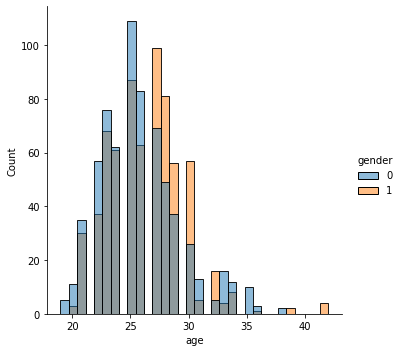

In [33]:
sns.displot(data=social_match, x="age", hue="gender");

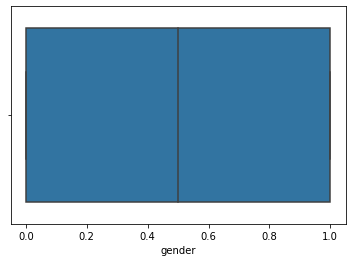

In [37]:
sns.boxplot(data=social_match, x="gender", hue="age");

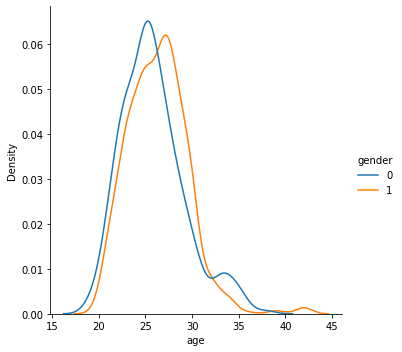

In [42]:
# number of match according age and gender
sns.displot(data=social_match, x="age", kind="kde", hue="gender");

In [44]:
social_match.groupby("gender").mean()["age"] 

gender
0    25.800000
1    26.353372
Name: age, dtype: float64

In [48]:
display(df_sd.groupby("gender")["age"].describe())
display(social_match.groupby("gender")["age"].describe())

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,4119.0,26.105851,3.683108,19.0,23.0,26.0,28.0,55.0
1,4164.0,26.609270,3.429930,18.0,24.0,27.0,29.0,42.0


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,680.0,25.800000,3.413307,19.0,23.0,25.0,28.0,38.0
1,682.0,26.353372,3.210170,20.0,24.0,26.0,28.0,42.0


In [54]:
social_match.groupby("gender")["age"].describe().reset_index()

,gender,count,mean,std,min,25%,50%,75%,max
0,0,680.0,25.800000,3.413307,19.0,23.0,25.0,28.0,38.0
1,1,682.0,26.353372,3.210170,20.0,24.0,26.0,28.0,42.0


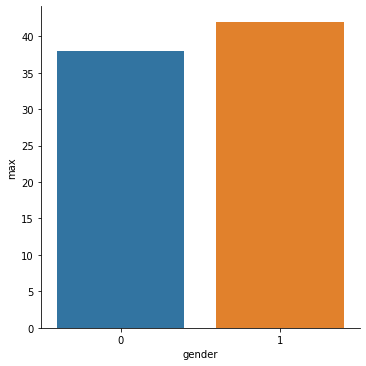

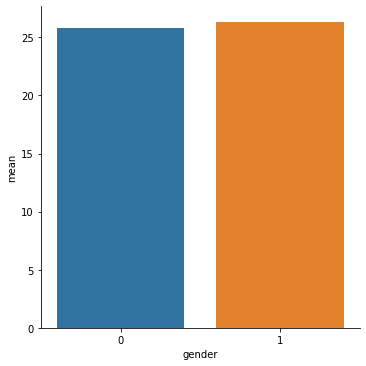

In [62]:
sns.catplot(data=social_match.groupby("gender")["age"].describe().reset_index(), x="gender", y="max", kind="bar")
sns.catplot(data=social_match.groupby("gender")["age"].describe().reset_index(), x="gender", y="mean", kind="bar")
plt.show()

In [63]:
## analyse number of match according first intention

In [86]:
df_goal = df_sd[["iid", "match", "goal"]]
df_goal["explain"] = df_goal["goal"].apply(lambda goal : "Seemed like a fun night out" if goal==1 else "To meet new people" if goal==2 else "To get a date" if goal==3 else "Looking for a serious relationship" if goal==4 else "To say I did it" if goal==5 else "Other")

# ho many people looking for serious relionship get a match
match_serious_people = 100 * (df_goal[df_goal["explain"]=="Looking for a serious relationship"].iid.unique().shape[0] / df_sd.iid.unique().shape[0])
# match_serious_people




<ipython-input-86-6f3c2ace0f74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goal["explain"] = df_goal["goal"].apply(lambda goal : "Seemed like a fun night out" if goal==1 else "To meet new people" if goal==2 else "To get a date" if goal==3 else "Looking for a serious relationship" if goal==4 else "To say I did it" if goal==5 else "Other")


551

In [87]:
# percentage of people receiving date according to they first intention
n_people = df_sd.iid.unique().shape[0]
n_people

551

In [148]:
total_match = len(df_goal[df_goal["match"]==1].iid.unique())
display("Total people have a match : {}".format(total_match))

n_math_id_goal = df_goal[df_goal["match"]==1].groupby("iid").first().groupby("goal").count()

n_math_id_goal = pd.DataFrame(round(100 * (n_math_id_goal["match"] / total_match), 1)).reset_index()
n_math_id_goal["explain"] = n_math_id_goal["goal"].apply(lambda goal : "Seemed like a fun night out" if goal==1.0 else "To meet new people" if goal==2.0 else "To get a date" if goal==3.0 else "Looking for a serious relationship" if goal==4.0 else "To say I did it" if goal==5.0 else "Other")
display(list(n_math_id_goal["match"].values))

# pie variables
match_goal = n_math_id_goal["match"].values
names = list(n_math_id_goal["explain"].unique())
explode = (0.05,0,0,0,0,0)
color_palette = ["#265952", "#DFCEEB", "#DBDE2F", "#45201E", "#c7ac92", "#a44a3f"]

display(n_math_id_goal)

'Total people have a match : 452'

[42.5, 34.1, 8.0, 4.2, 6.0, 4.0]

,goal,match,explain
0,1.0,42.5,Seemed like a fun night out
1,2.0,34.1,To meet new people
2,3.0,8.0,To get a date
3,4.0,4.2,Looking for a serious relationship
4,5.0,6.0,To say I did it
5,6.0,4.0,Other


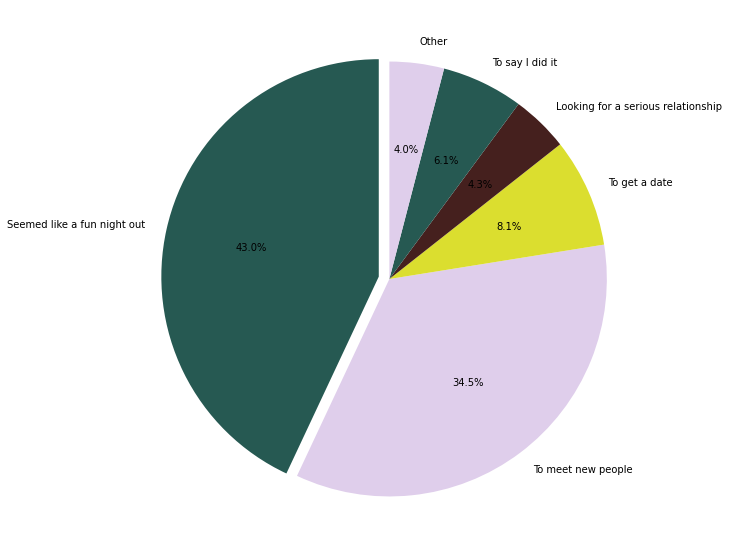

In [149]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.pie(match_goal, labels=names, 
       autopct="%1.1f%%", 
       explode=explode, 
       shadow=False, 
       colors=color_palette[:4],
       startangle=90)